In [1]:
from ugropy import abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

from rdkit.Chem import Draw

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(1, 220, 220, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [3]:
for idx, smiles in enumerate(df.index):
    solution = abdulelah_gani_p.get_groups(smiles, "smiles", search_multiple_solutions=True)
    
    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles][df.loc[smiles] != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()

    # Verificar si ninguna solución tiene subgroups_numbers igual a row_dict
    if all([sol.subgroups_numbers != row_dict for sol in solution]):
        print(smiles)
        print(idx)
        print("Subgrupos:")
        print("\n".join(str(sol.subgroups) for sol in solution))  # Convertir a string y unir con saltos de línea
        print("Subgrupos por número:")
        print("\n".join(str(sol.subgroups_numbers) for sol in solution))  # Convertir a string y unir con saltos de línea
        print("Gani: ")
        print(row_dict)
        
        wrong_smiles = smiles
        break


Brc1ccc2c(c1)Cc3cc(N)ccc23
84
Subgrupos:
{'aCH': 6, 'aC fused with aromatic ring': 2, 'aC fused with non-aromatic ring': 2, 'aC-NH2': 1, 'aC-Br': 1, 'CH2 (cyclic)': 1}
Subgrupos por número:
{15: 6, 16: 2, 17: 2, 62: 1, 126: 1, 168: 1}
Gani: 
{15: 6, 17: 4, 62: 1, 126: 1, 168: 1}


In [4]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

abdulelah_gani_p.detect_fragments(mol)


{'aCH_0': (2,),
 'aCH_1': (3,),
 'aCH_2': (6,),
 'aCH_3': (9,),
 'aCH_4': (12,),
 'aCH_5': (13,),
 'aC fused with aromatic ring_0': (4,),
 'aC fused with aromatic ring_1': (14,),
 'aC fused with non-aromatic ring_0': (5,),
 'aC fused with non-aromatic ring_1': (8,),
 'aC except as above_0': (1,),
 'aC except as above_1': (10,),
 'aC-NH2_0': (10, 11),
 'NH2 except as above_0': (11,),
 'aC-Br_0': (1, 0),
 '-Br except as above_0': (0,),
 'CH2 (cyclic)_0': (7,)}

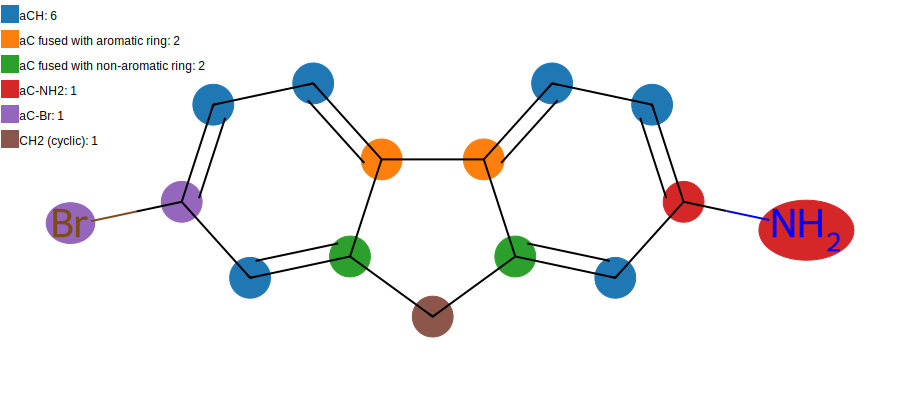

In [5]:
sol = abdulelah_gani_p.get_groups(wrong_smiles, "smiles")

sol.draw(width=900, height=400)

In [6]:
sols = abdulelah_gani_p.get_groups(wrong_smiles, "smiles", search_multiple_solutions=True)

for sol in sols:
    print(sol.subgroups_numbers)

{15: 6, 16: 2, 17: 2, 62: 1, 126: 1, 168: 1}


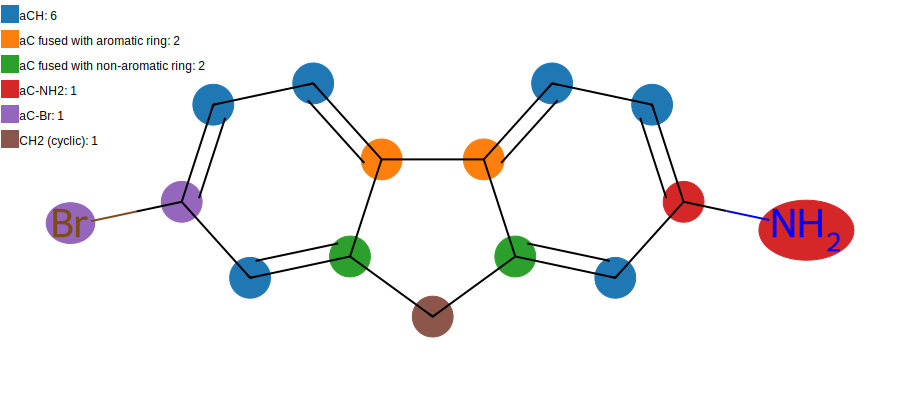

In [7]:
sols[0].draw(width=900, height=400)

In [8]:
sols[1].draw(width=900, height=400)

IndexError: list index out of range

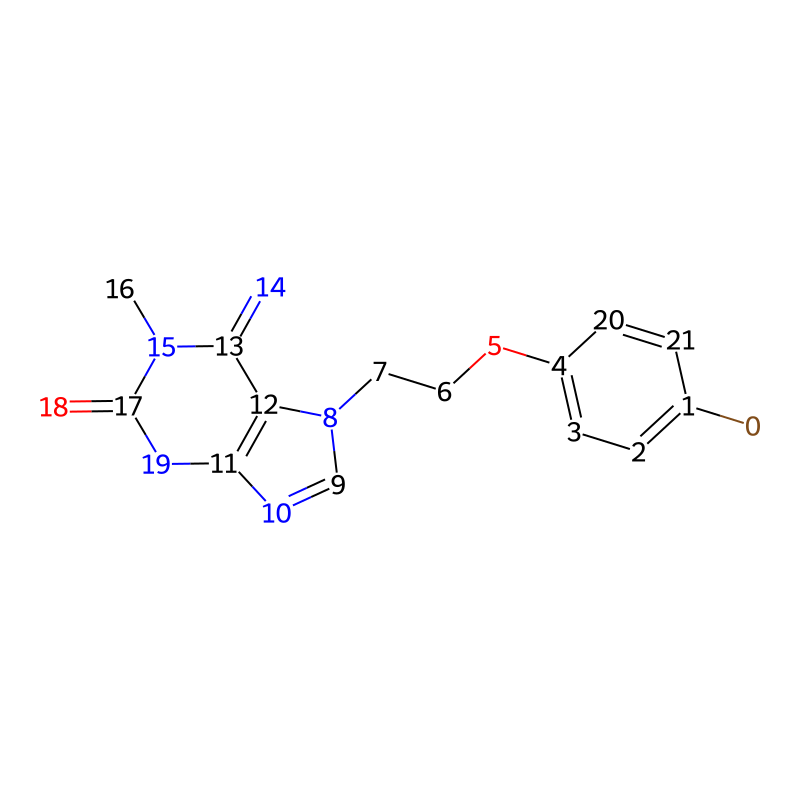

In [ ]:
# Configurar etiquetas personalizadas para mostrar los índices de los átomos
for atom in mol.GetAtoms():
    atom.SetProp('atomLabel', str(atom.GetIdx()))

# Dibujar la molécula con los índices
img = Draw.MolToImage(mol, size=(800, 800))

img

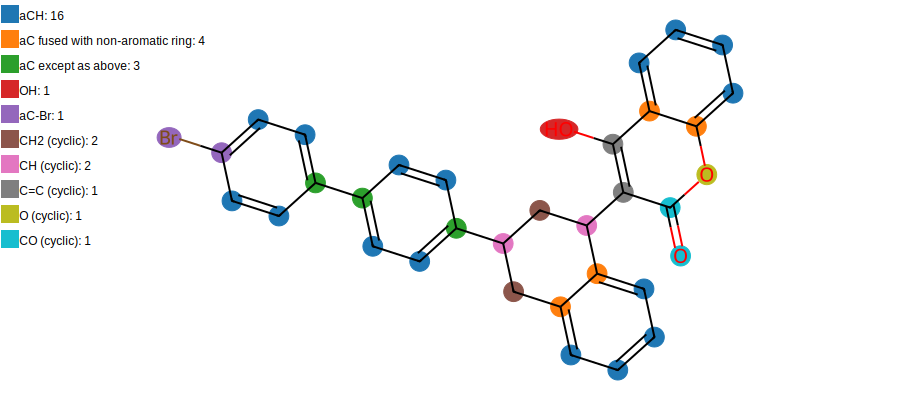

In [ ]:
smiles = 'Brc1ccc(cc1)c2ccc(cc2)C3Cc4ccccc4C(C3)C5=C(O)c6ccccc6OC5=O'

sol = abdulelah_gani_p.get_groups(smiles, "smiles")

sol.draw(width=900, height=400)